### Capstone Project Modul 3 E-Commerce Churn Analysis 
#### Rieval Erlangga Wijanarko JCDSOL-Group 1

### Outline

* Business Understanding
* Data Understanding & Data Cleaning
* Exploratory Data Analysis
* Feature Engineering
* Hyperparameter Tuning
* Post Modelling
* Conclusion and Recommendation



## Business Understanding

### Latar Belakang

E-commerce adalah semua kegiatan perdagangan yang dilakukan melalui media elektronik. Untuk televisi dan telepon tersedia, tetapi lebih banyak e-commerce terjadi melalui internet. Perkembangan teknologi, khususnya internet, mempengaruhi banyak bidang kehidupan, termasuk ritel. Perdagangan telah berubah dalam hal proses jual beli dan pemasaran produk. Proses perdagangan ini umumnya dikenal sebagai electronic commerce atau e-commerce.

Pengertian e-commerce menurut Laudon & Laudon adalah proses penjualan dan pembelian barang secara elektronik oleh konsumen, yang merupakan transaksi business-to-business dengan perantara komputer, yakni menggunakan jaringan komputer.

David Baum (1999) kemudian juga mendefinisikan e-commerce sebagai seperangkat teknologi dinamis dengan bentuk aplikasi dan proses bisnis yang menghubungkan bisnis, konsumen dan masyarakat melalui e-commerce dalam pertukarang barang, jasa dan informasi secara elektronik

Pemahaman tentang e-commerce ini dapat menyebabkan kesalahpahaman tentang bagaimana sistem e-commerce dan pasar. Istilah e-comerce digunakan untuk menggabarkan semua transaksi yang menggunakan media elektronik.



### Pernyataan masalah

Pelanggan setia yang churn dapat menimbulkan kerugian bagi perusahaan jika tidak ditanggulangi. Oleh karena itu, penting bagi perusahaan untuk mempertahankan keterlibatan pelanggan setia di platform e-commerce. Salah satu cara untuk mencapai hal ini adalah dengan menawarkan promosi. Namun, biaya dan sumber daya yang dikeluarkan mungkin menjadi kurang efektif jika promosi dilakukan tanpa pendekatan strategis. Dalam industri e-commerce, sangat penting untuk memprediksi dan mengatasi churn pelanggan secara akurat untuk mempertahankan pelanggan dan meminimalkan dampak negatif terhadap bisnis pendapatan dan profitabilitas.


### Tujuan

Perusahaan dapat melakukan tindakan preventif dengan memprediksi churn pelanggan. Dengan mengidentifikasi pelanggan yang kemungkinan akan churn, strategi pemasaran dapat ditargetkan dengan lebih efektif. Hal ini dapat mengurangi biaya pemasaran dan meningkatkan keuntungan dengan mempertahankan pelanggan setia. Selain itu, memahami faktor-faktor yang mempengaruhi churn pelanggan dapat memberikan wawasan berharga untuk membuat keputusan strategi pemasaran.

### Pendekatan Analitik

Pendekatan analitik yang dilakukan berupa pembuatan, evaluasi dan implementasi model machine learning klasifikasi yang dapat memprediksi apabila pelanggan akan churn atau tidak berdasarkan riwayat data sebelumnya.

**Metrik Evaluasi**



|       | N-Pred| P-Pred |
| --- | --- | --- |
| **N-Act**     | TP | FP |
| **P-Act**      | FN | TP |

Target:   
0 : Pelanggan tidak churn  
1 : Pelanggan churn

Type 1 error : False Positive  
Konsekuensi: Mengeluarkan biaya untuk pelanggan yang tidak tepat sasaran atau pelanggan yang tidak akan churn. 

Type 2 error : False Negative  
Konsekuensi: Hilangnya pelanggan loyal

Berdasarkan konsekuensinya, langkah yang tepat untuk pemilihan model adalah model yang mengurangi hilangnya pelanggan loyal, tetapi tetap memperhatikan pengeluaran biaya pemasaran untuk pelanggan yang kurang tepat. Recall dan precision yang diseimbangkan akan dari kelas positif (Pelanggan *churn*). Metrik yang akan digunakan adalah Recall. 

# Data Understanding & Data Cleaning

Kumpulan data tersebut milik perusahaan E-commerce online terkemuka pada tahun 2020. Sebuah perusahaan retail online (E-commerce) ingin mengetahui pelanggan yang akan churn, sehingga dilakukan pendekatan berupa promo terhadap kelompok pelanggan tersebut.

### Import Library

In [1]:
# Library
import numpy as np 
import pandas as pd 

# Library for visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# Library for train test split
from sklearn.model_selection import train_test_split

# Library for impute missing values
from sklearn.impute import SimpleImputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import KNNImputer 


# Library for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# Library for encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# Library for column transformer & pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# Library for cross validation
from sklearn.model_selection import cross_val_score

# Library for algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

# Library for metric evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingClassifier, StackingClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pickle

In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [4]:
df.shape

(3941, 11)

In [5]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [6]:
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


### Features


| Attribute | Data Type| Description | Variable Type  |
| --- | --- | --- | --- |
| Tenure | Float | Tenure of customer in ecommerce company | Quant. Continuous |
| WarehouseToHome | Float | Distance in between warehouse to home of customer | Quant. Continuous |
| NumberOfDeviceRegistered | Integer | Total number of devices is registered on particular customer | Quant. Discrete |
| PreferedOrderCat | Text | Preferred order category of customer in last month | Qual. (Nominal) |
| SatisfactionScore | Integer | Satisfactory score of customer on service | Qual. (Ordinal) |
| MaritalStatus | Text | Marital status of customer | Qual. (Nominal) |
| NumberOfAddress | Integer | Total number of added added on particular customer | Quant. Discrete | 
| Complain | Integer | Any complaint has been raised in last month | Qual. (Nominal)|
| DaySinceLastOrder | Float | Day Since last order by customer | Quant. Continuous |
| CashbackAmount | Float | Average cashback in last month | Quant. Continuous |
| Churn | Integer | 0 - Not Churn, 1 - Churn| Qual. (Nominal) | 

### Description of feature 

1. Pada kumpulan dataset e-commerce churn, kolom "Tenure" menunjukkan durasi waktu, yang diasumsikan menunjukkan lamanya waktu pelanggan dengan perusahaan. Informasi in bisa dipakai untuk memahami hubungan antara kebiasaan pelanggan dengan kemungkinan untuk churn atau berhenti menggunakan layanan. Sebagai contoh, pelanggan yang telah lama menggunakan layanan mungkin cenderung tidak akan churn sedangkan pelanggan baru mungkin lebih cenderung mencoba layanan berbeda atau churn jika mereka tidak puas.

2. "Warehouse to home" mengacu pada jarak antara gudang penyimpanan produk dan rumah pelanggan. Jarak ini menunjukkan seberapa jauh produk harus dikirim dari gudang ke lokasi pelanggan. Semakin dekat jarak antara gudang dan rumah pelanggan, semakin cepat pelanggan dapat menerima produk. Oleh karena itu, jarak ini dapat memengaruhi kepuasan pelanggan dan kemungkinan mereka untuk tetap menjadi pelanggan.

3. "Number of Device Registered" menunjukkan jumlah perangkat yang terdaftar di akun pelanggan. Ini menunjukkan berapa banyak perangkat yang digunakan pelanggan untuk terlibat dalam transaksi di platform e-commerce. Misalnya, jika pelanggan memiliki 2 perangkat yang terdaftar di akun mereka, nilai di kolom ini adalah 2. Ada beberapa cara untuk menganalisis korelasi antara jumlah perangkat terdaftar dan tingkat churn pelanggan. Misalnya, jika pelanggan memiliki lebih banyak perangkat terdaftar, mereka mungkin memiliki keterlibatan yang lebih tinggi dengan toko e-commerce dan cenderung melakukan churn lebih sedikit. Sebaliknya, jika pelanggan hanya memiliki satu perangkat terdaftar, mereka mungkin memiliki lebih sedikit interaksi dengan toko e-commerce dan cenderung melakukan churn lebih banyak. Oleh karena itu, penting untuk mengamati korelasi antara "Jumlah Perangkat Terdaftar" dan tingkat churn pelanggan untuk memahami bagaimana faktor ini memengaruhi churn pelanggan.

4. Kolom "Prefered Order Category" menunjukkan kategori yang paling sering dipesan oleh pelanggan. Bisa ada berbagai kategori, seperti elektronik, pakaian, kosmetik, dan sebagainya. Dalam kasus ini, korelasi antara "Prefered Order Category" dan churn dapat dianalisis dengan memeriksa seberapa sering pelanggan memesan produk dalam kategori tersebut dan seberapa sering mereka churn. Jika pelanggan sering memesan produk dalam kategori tertentu dan churn lebih jarang, dapat dikatakan bahwa preferensi pemesanan mereka memiliki korelasi negatif dengan churn. Sebaliknya, jika pelanggan sering churn setelah memesan produk dalam kategori tertentu, dapat dikatakan bahwa preferensi pemesanan mereka memiliki korelasi positif dengan churn.

5. "Satisfaction Score" merupakan penilaian yang mengukur tingkat kepuasan pelanggan terhadap layanan yang diterima dari sebuah toko daring. Penilaian ini biasanya diberikan setelah pelanggan menyelesaikan transaksi atau menggunakan layanan dari toko tersebut. Kepuasan pelanggan sangat penting karena dapat memengaruhi keputusan mereka untuk terus berbelanja di toko tersebut atau memutuskan untuk pindah ke toko lain. Oleh karena itu, penilaian kepuasan sangat penting dalam memprediksi tingkat churn pelanggan, yang merupakan tingkat di mana pelanggan memutuskan untuk berhenti berbelanja di toko tersebut. Jika penilaian kepuasan rendah, maka kemungkinan terjadinya churn semakin tinggi. Sebaliknya, jika penilaian kepuasan tinggi, maka kemungkinan terjadinya churn semakin rendah.

6. Pada kolom "Marital Status" terdapat tiga kategori: "single", "married" dan "divorced". Korelasi antara setiap kategori dan tingkat churn dapat ditemukan melalui analisis data. Dalam analisis ini, saya akan membandingkan tingkat churn di antara pelanggan single, married, dan divorced untuk menentukan apakah ada hubungan yang signifikan antara status perkawinan dan tingkat churn. Namun, penting untuk dicatat bahwa korelasi tidak selalu menunjukkan sebab akibat, jadi faktor lain yang dapat memengaruhi tingkat churn juga harus dipertimbangkan.

7. Kolom "Number of Address" mencatat jumlah alamat yang dimiliki oleh pelanggan e-commerce. Korelasi antara "Jumlah Alamat" dan churn dapat menunjukkan apakah pelanggan dengan beberapa alamat lebih stabil atau lebih kecil kemungkinannya untuk churn. Jika pelanggan memiliki beberapa alamat, hal itu dapat menunjukkan bahwa mereka memiliki kebutuhan yang lebih tinggi dan lebih kecil kemungkinannya untuk meninggalkan layanan e-commerce. Namun, pengujian statistik diperlukan untuk memastikan korelasi yang signifikan. Transformasi data menjadi variabel kategoris dapat dilakukan untuk memfasilitasi analisis dan meminimalkan perbedaan skala yang dapat memengaruhi hasil. Dalam hal ini, jumlah alamat mungkin memiliki banyak nilai berbeda yang membuatnya sulit untuk dianalisis. Oleh karena itu, membuat kategori seperti "satu alamat", "dua alamat", "tiga alamat", dll., membuat data lebih mudah dianalisis.

8. Kolom "Complain" menunjukkan apakah pelanggan telah mengajukan keluhan dalam bulan terakhir. Nilai "1" menunjukkan bahwa pelanggan telah mengajukan keluhan selama periode tersebut, sedangkan nilai "0" menunjukkan bahwa pelanggan belum mengajukan keluhan. Korelasi antara kolom "Complain" dan churn dapat dianalisis untuk mengetahui apakah pelanggan yang mengajukan keluhan cenderung berhenti berlangganan (churn) atau tidak. Jika ditemukan bahwa pelanggan yang mengajukan keluhan memiliki tingkat churn yang lebih tinggi dibandingkan dengan yang tidak mengajukan keluhan, maka kolom "Complain" dapat dianggap sebagai faktor risiko yang memengaruhi churn.

9. Kolom "Day Since Last Order" menunjukkan durasi sejak pesanan terakhir pelanggan. Dalam konteks ini, churn biasanya didefinisikan sebagai pelanggan yang tidak melakukan pemesanan dalam jangka waktu tertentu. Oleh karena itu, kolom "Day Since Last Order" sangat penting dalam mendefinisikan churn karena membantu menentukan apakah pelanggan masih aktif atau sudah tidak aktif. Jika kolom "Day Since Last Order" memiliki korelasi yang kuat dengan churn, dapat dikatakan bahwa pelanggan yang lebih jarang melakukan pemesanan cenderung memiliki tingkat churn yang lebih tinggi. Oleh karena itu, menganalisis korelasi antara kolom ini dan churn memberikan wawasan berharga tentang faktor-faktor yang memengaruhi churn pelanggan.

10. "Cashback Amount" adalah kolom yang menunjukkan jumlah rata-rata cashback yang diperoleh pelanggan pada bulan lalu. Dalam hal ini, cashback mengacu pada program promosi yang disediakan oleh perusahaan e-commerce untuk memberi insentif kepada pelanggan agar terus berbelanja. Korelasi antara Jumlah Cashback dan churn dapat dianalisis untuk memahami apakah ada hubungan antara jumlah cashback yang diperoleh pelanggan dan keputusan mereka untuk tetap menjadi pelanggan atau churn.

Dari data diatas dapat diketahui beberapa hal:

* Terdapat 3941 baris dan 11 kolom pada dataset
* Data Numeric dengan variable quantitative antara lain `Tenure`, `Warehouse to Home`, `Number of Device`, `Number of Addrress`, `Day Since Last Order` dan `Cashback Amount`.
* Data Numeric yang menunjukkan yes or no atau bersifat qualitative adalah `Complain`, dan `Churn`.
* Data Numeric yang menunjukkan qualitative dengan scale ordinal adalah `Satisfaction Score`.
* Data Categoric ada dua antara lain `Prefered Order Cat` dan `Marital Status`.
* Terdapat Missing Value pada kolom `Tenure`, `WarehouseToHome`, `DaySinceLastOrder`.

In [7]:
# Data unik masing- masing features

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].unique())])

dataDesc = pd.DataFrame(columns=['data features', 'data type', 'null', 'null percentage', 'unique', 'unique value'],
                     data=listItem)
dataDesc

,data features,data type,null,null percentage,unique,unique value
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Beberapa observasi dapat dilakukan:

1. Dataset terdiri dari 3941 baris dan 11 kolom.
2. Data numerik meliputi variabel kuantitatif seperti Tenure, Warehouse to Home, Number of Device, Number of Address, Day Since Last Order, dan Cashback Amount. Data numerik yang menunjukkan "ya" atau "tidak" atau bersifat kualitatif adalah Complain dan Churn. Satisfaction Score merupakan variabel kualitatif dengan skala ordinal.
3. Terdapat dua variabel kategori, yaitu Preferred Order Cat dan Marital.

In [9]:
df[df.duplicated()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


In [10]:
(len(df[df.duplicated()])/len(df))*100

17.026135498604415

Terdapat data duplikat sebanyak : 671 dari 3941 baris dengan presentase 17.03%

In [11]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [12]:
df.duplicated().sum()

0

### Check Missing Value

In [13]:
#mengecek missing value pada masing-masing kolom
df.isnull().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [14]:
#menghitung jumlah missing value
print(f'Jumlah missing value: {df.isnull().sum().sum()}')
print(f'Jumlah baris dengan missing value: {df[df.isnull().any(axis=1)].shape[0]}')
print(f'Presentase baris dengan missing value {round(df.isnull().sum().sum()/df.shape[0]*100,2)}%')

Jumlah missing value: 476
Jumlah baris dengan missing value: 476
Presentase baris dengan missing value 14.56%


### Handling Missing Value

(array([1272.,  751.,  495.,  336.,  222.,   30.,    0.,    0.,    2.,
           2.]),
 array([ 0. ,  6.1, 12.2, 18.3, 24.4, 30.5, 36.6, 42.7, 48.8, 54.9, 61. ]),
 <BarContainer object of 10 artists>)

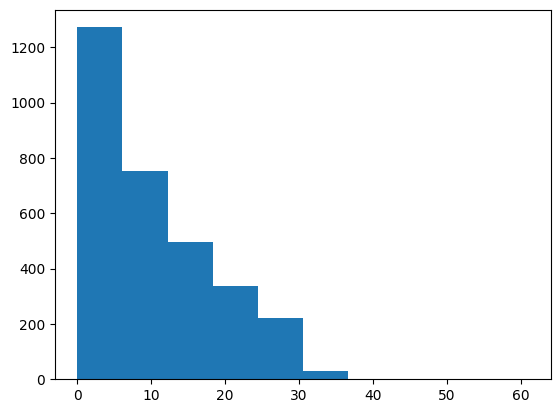

In [15]:
# Check distribution of tenure without missing value

plt.hist(df['Tenure'].dropna())

Terdapat distribusi yang condong positif pada data kolom Tenure. Dari distribusi ini, dapat disimpulkan bahwa pengisian data dengan median lebih tepat daripada mean.

<Axes: >

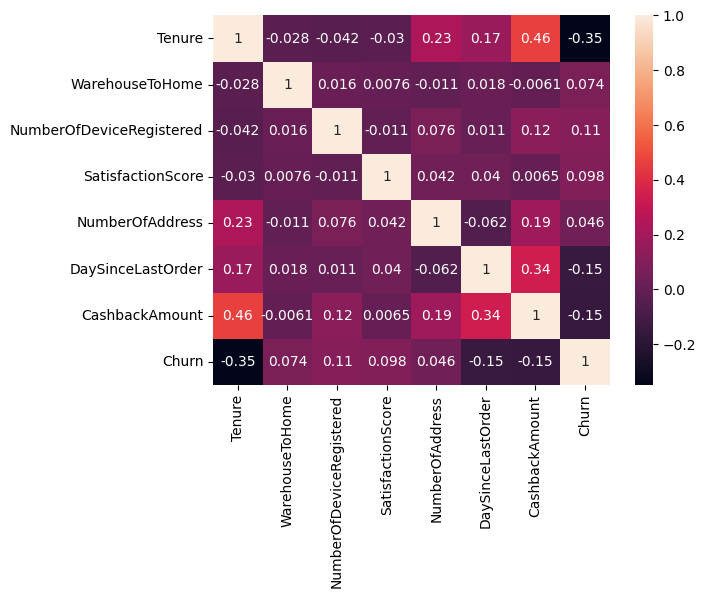

In [16]:
# Heatmap of numerical columns

corr = df[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress','DaySinceLastOrder', 'CashbackAmount',
       'Churn']].corr()

sns.heatmap(corr, annot=True)

In [17]:
# Filling Tenure Value with median

median = df['Tenure'].median()
df['Tenure'].fillna(median, inplace=True)

In [18]:
df.isnull().sum()

Tenure                        0
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

Text(0, 0.5, 'Frequency')

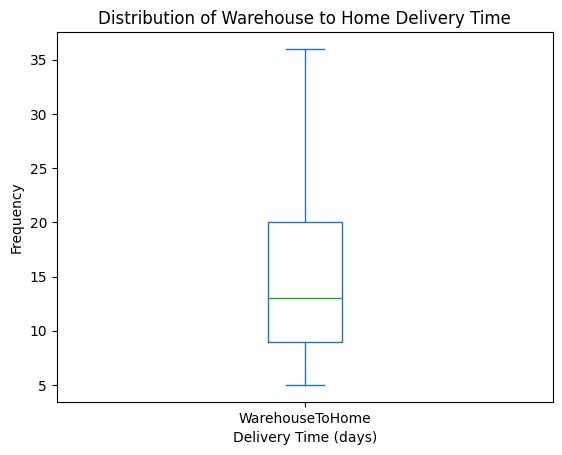

In [19]:
# Check Warehouse to Home

df['WarehouseToHome'].plot.box(showfliers=False)
plt.title("Distribution of Warehouse to Home Delivery Time")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Frequency")

Data yang terdistribusi normal akan memiliki diagram kotak yang simetris dengan median sebagai titik pusat dan distribusi data yang relatif merata. Namun, visualisasi di atas menunjukkan adanya kemiringan positif dalam data.

In [20]:
# Filling WarehouseToHome with median

median = df['WarehouseToHome'].median()
df['WarehouseToHome'].fillna(median, inplace=True)

In [21]:
df.isnull().sum()

Tenure                        0
WarehouseToHome               0
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

<Axes: xlabel='DaySinceLastOrder', ylabel='Count'>

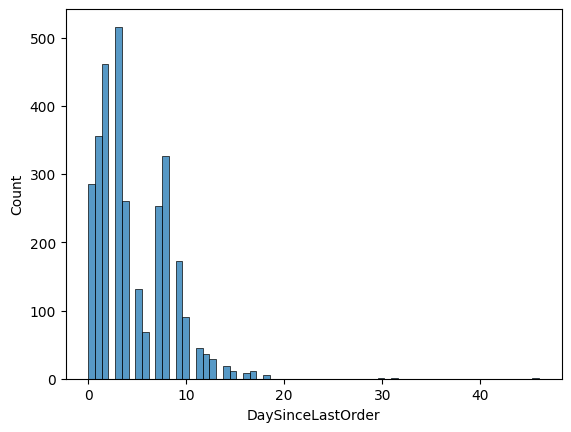

In [22]:
# Check DaySinceLastOrder distribution

sns.histplot(df['DaySinceLastOrder'])

Data dalam kolom "Day Since Last Order" juga tidak menunjukkan distribusi normal, yang menunjukkan bahwa penggunaan median untuk mengisi missing value akan lebih tepat.

In [23]:
# Filling DaySinceLastOrder with median

median = df['DaySinceLastOrder'].median()
df['DaySinceLastOrder'].fillna(median, inplace=True)

In [24]:
df.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

Semua nilai yang hilang di kolom Tenure, WarehouseToHome, dan DaySinceLastOrder telah ditangani dengan tepat sehingga tidak ada lagi nilai yang hilang dalam data

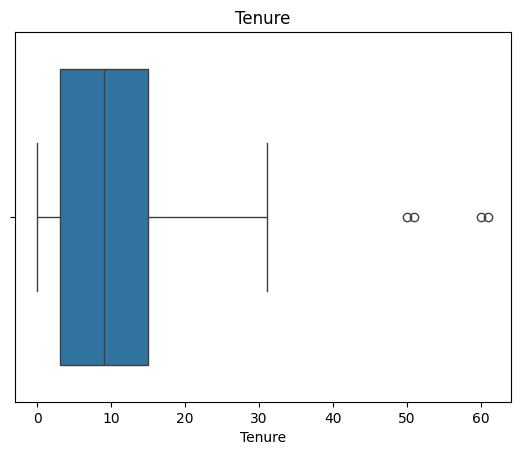

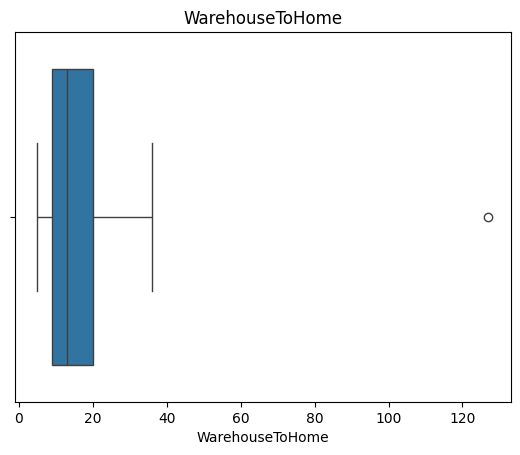

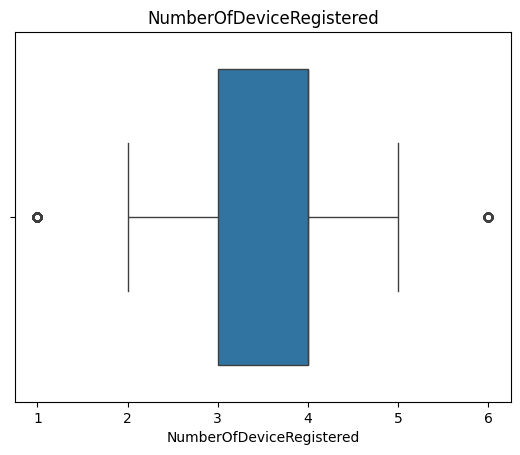

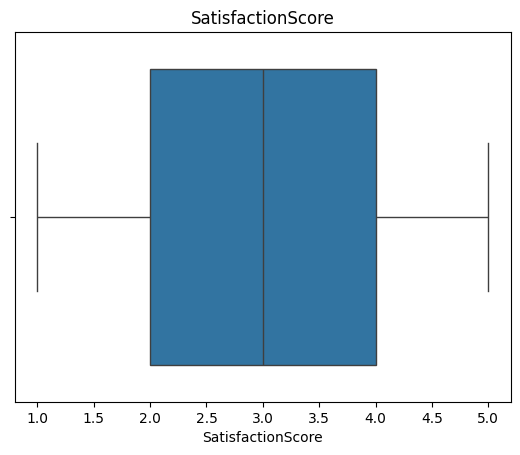

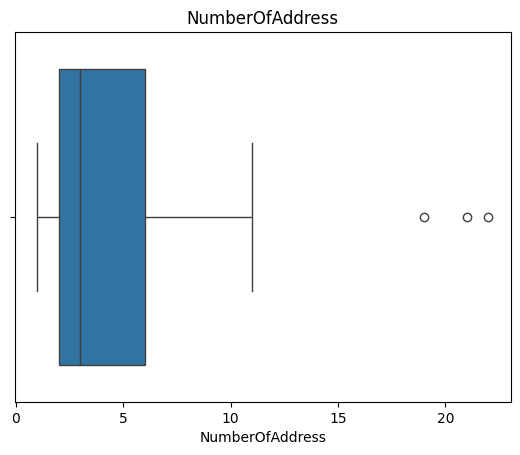

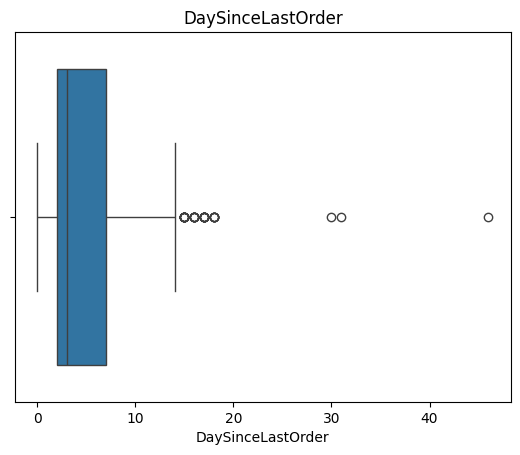

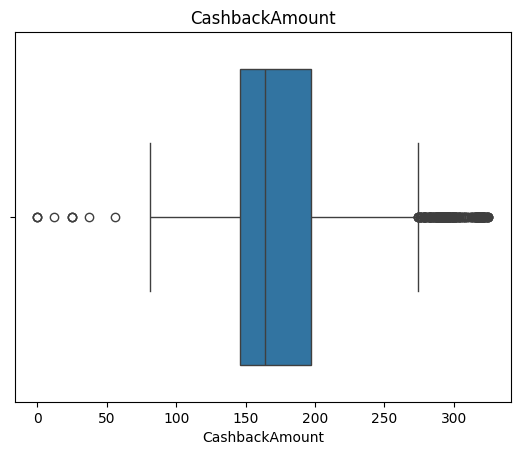

In [25]:
numerical_cols = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [26]:
def detect_outliers(df):
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    return outliers
outliers = detect_outliers(df)
for col, count in outliers.items():
    print(f"Column: {col}, Outliers: {count}")

Column: Tenure, Outliers: 4
Column: WarehouseToHome, Outliers: 1
Column: NumberOfDeviceRegistered, Outliers: 226
Column: SatisfactionScore, Outliers: 0
Column: NumberOfAddress, Outliers: 3
Column: Complain, Outliers: 0
Column: DaySinceLastOrder, Outliers: 40
Column: CashbackAmount, Outliers: 253
Column: Churn, Outliers: 534


Dalam temuan di atas, kita dapat mengidentifikasi bahwa terdapat sejumlah besar outlier dalam kolom "NumberOfDeviceRegistered" dan "CashbackAmount" (tidak termasuk "Churn" karena merupakan variabel dependen dan hanya berisi 2 nilai unik). Namun, dalam kasus kolom "NumberOfDeviceRegistered" dan "NumberOfAddress", kita tidak dapat mengasumsikan outlier berdasarkan definisi outlier karena kolom-kolom ini mewakili data numerik diskrit, bukan data kontinu.

In [27]:
# The outliers in the "Cashback Amount" column have an equal proportion of churn and non-churn cases compared to the overall data.
def calculate_outlier_churn_ratio(df, column):
    cashback_amount = df[column]
    Q1 = np.percentile(cashback_amount, 25)
    Q3 = np.percentile(cashback_amount, 75)
    IQR = Q3 - Q1
    outlier_threshold = Q3 + 1.5 * IQR
    outlier_indexes = cashback_amount[(cashback_amount > outlier_threshold)].index
    churned_outliers = df.loc[outlier_indexes, 'Churn']
    churn_ratio_outliers = churned_outliers.mean()
    return churn_ratio_outliers

# Apply the function to the 'CashbackAmount' column
churn_ratio_outliers = calculate_outlier_churn_ratio(df, 'CashbackAmount')
print(f"Churn ratio for outliers in 'CashbackAmount': {churn_ratio_outliers}")


Churn ratio for outliers in 'CashbackAmount': 0.045081967213114756


In [28]:
df['Churn'].value_counts()

Churn
0    2736
1     534
Name: count, dtype: int64

In [29]:
df['Churn'].value_counts()/len(df)

Churn
0    0.836697
1    0.163303
Name: count, dtype: float64

Karena perbedaan proporsi antara kasus churn dan non-churn dalam data outlier kolom "Cashback Amount", tidak mungkin untuk menghapus atau mengabaikan titik data ini. Mengambil tindakan tersebut akan mengganggu keseimbangan set data pelatihan, yang dapat berdampak buruk pada kinerja model machine learning. Oleh karena itu, tidak ada penanganan khusus yang akan diterapkan pada outlier untuk menjaga integritas data dan mempertahankan proporsi asli kasus churn dan non-churn untuk pelatihan.

## Data Analysis

### Customer Churn

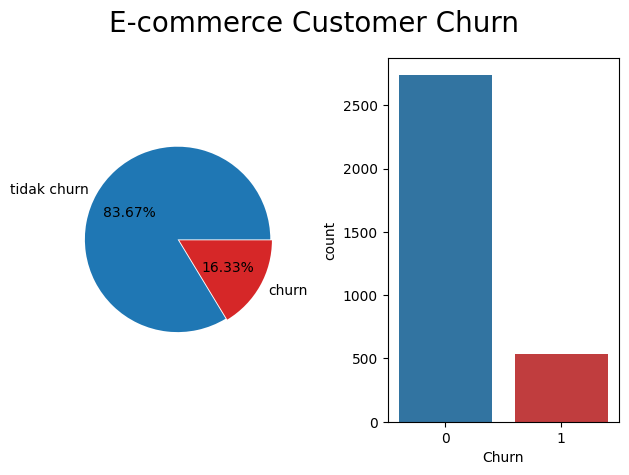

In [30]:
# Perbandingan pelanggan tidak churn dan churn
sns.color_palette('pastel')
plt.figure().suptitle('E-commerce Customer Churn', fontsize=20)
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=['tidak churn','churn'], colors= ['tab:blue','tab:red'],autopct='%.2f%%',explode=(0.01,0.01))
plt.subplot(1,2,2)
sns.countplot(data=df, x='Churn',palette=['tab:blue',"tab:red"])
sns.color_palette('pastel')
plt.tight_layout()
plt.show()  

Dari data diatas dapat dilihat bahwa dataset merupakan data imbalance karena kelas timpang, dengan proporsi tidak churn 83,67% dan proporsi churn 16.33%. Data imbalance dapat memiliki dampak buruk pada model machine learning yang akan dibuat terutama pada saat memprediksi kelas dengan jumlah yang lebih sedikit atau kelas minoritas. Sehingga akan dilakukan metode resampling SMOTE atau Synthetic Minority Oversampling Technique, yaitu menambah kelas minoritas yang akan dilakukan pada saat modeling.   
  
Analisa selanjutnya akan dilihat pengaruh masing-masing variabel(fitur) terhadap *customer churn*.

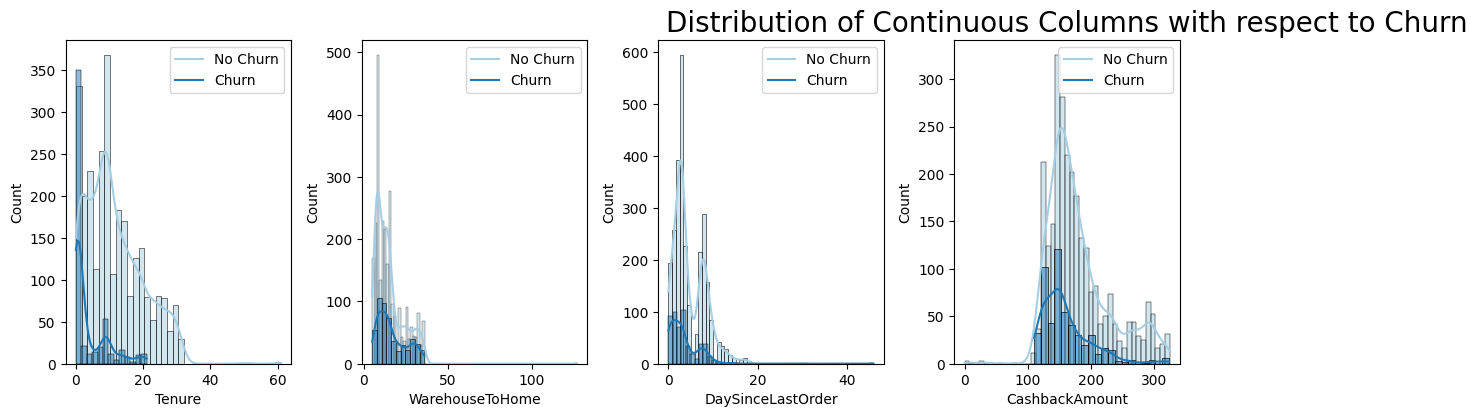

In [31]:
continuous = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
a = 1
plt.figure(figsize=(12, 15))
sns.set_palette('Paired')
for i in continuous :
    plt.subplot(4, 4, a)
    sns.histplot(x=df[df['Churn'] == 0][i], kde=True)
    sns.histplot(x=df[df['Churn'] == 1][i], kde=True)
    plt.legend(labels=['No Churn', 'Churn'])
    plt.tight_layout()
    a += 1
plt.title('Distribution of Continuous Columns with respect to Churn', fontsize=20)
plt.show()

Pada grafik distribusi kontinu diatas terhadap churn, karena proporsi tidak churn memang lebih besar dari churn, sehingga didapat beberapa insight, antara lain:
* Tenure merupakan masa penggunaan platform e-commerce dari pertama mendaftar dalam satuan bulan, semakin kecil bulan penggunaan platform, maka semakin besar pelanggan churn. Terdapat juga fluktuasi pelanggan tidak churn pada bulan 8-11, yang menunjukkan rate pelanggan loyal semakin tinggi di range bulan tersebut.
* WarehouseToHome merupakan jarak antara gudang dengan rumah pelanggan, data pelanggan churn terdistribusi hampir rata. Tetapi selisih pelanggan churn dan tidak churn diatas 20KM sangat kecil, sehingga dapat disimpulkan semakin jauh jarak gudang dengan rumah pelanggan, maka ada kemungkinan pelanggan churn dibanding tidak churn. 
* DaySinceLastOrder pada pelanggan churn dan tidak churn menunjukkan distribusi yang hampir sama. Akan dianalisa lebih lanjut untuk korelasi data daysincelastorder dan churn. 
* CashbackAmount pelanggan churn paling tinggi berada di sekitar 150, dan akan dianalisa lebih lanjut faktornya. 

Selain distribusinya terhadap tidak churn dan churn, akan dilihat distribusi rata-rata pelanggan churn berdasarkan masing-masing variabel.

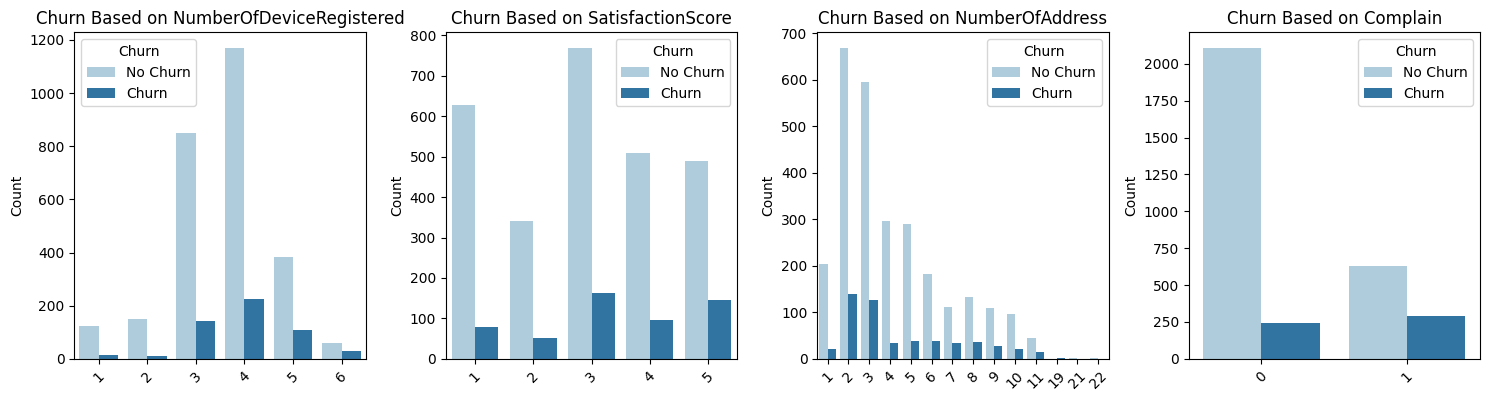

In [32]:
columns = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']
b = 1
plt.figure(figsize=(15, 15))

for i in columns:
    plt.subplot(4, 4, b)
    sns.countplot(x=i, hue='Churn', data=df, palette='Paired')
    plt.title(f'Churn Based on {i}', fontsize=12)
    plt.ylabel('Count')
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['No Churn', 'Churn'])
    plt.tight_layout()
    b += 1

plt.show()

Berdasarkan data tersebut, kita dapat menyimpulkan bahwa. 

Pertama, mayoritas pelanggan yang berhenti berlangganan memiliki tiga hingga empat perangkat terdaftar dan satu atau tiga alamat. Hal ini menunjukkan bahwa pelanggan dengan beberapa perangkat dan alamat lebih mungkin untuk berhenti berlangganan.

Kedua, pelanggan yang memberikan peringkat kepuasan 5 memiliki tingkat berhenti berlangganan tertinggi. Hal ini menunjukkan bahwa bahkan pelanggan yang sangat puas pun mungkin masih akan berhenti berlangganan. Penting untuk memahami alasan mendasar di balik keputusan mereka untuk berhenti berlangganan, meskipun mereka tampak puas di permukaan.

# Variable Kategorikal

### PreferedOrderCat

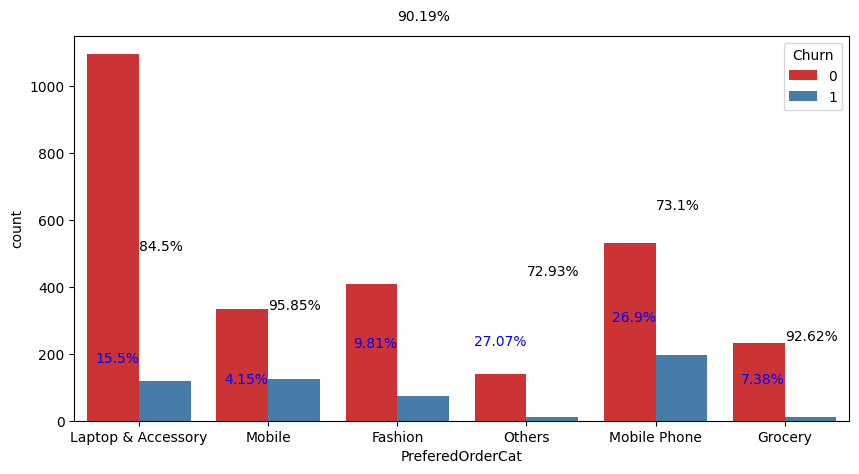

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x='PreferedOrderCat', hue='Churn', data=df, palette='Set1')
churn_counts = df[df['Churn'] == 1].groupby('PreferedOrderCat').size().reset_index(name='churn_count')
not_churn_counts = df[df['Churn'] == 0].groupby('PreferedOrderCat').size().reset_index(name='not_churn_count')

for i in range(6):
    category = churn_counts['PreferedOrderCat'][i]
    churn = churn_counts['churn_count'][i]
    not_churn = not_churn_counts['not_churn_count'][i]
    total = churn + not_churn
    percent_churn = (churn / total) * 100
    percent_not_churn = (not_churn / total) * 100
    plt.text(i, churn + 100, str(round(percent_churn, 2)) + '%', ha='right', color='blue')
    plt.text(i, not_churn + 100, str(round(percent_not_churn, 2)) + '%', ha='left', color='black')

plt.show()

Berdasarkan kategori Prefered Order Category, terdapat persentase churn yang lebih tinggi, lebih dari 10% yang diamati pada Laptop & Accessory, Mobile Phone, dan Lainnya dibandingkan dengan kategori lainnya.

### MaritalStatus

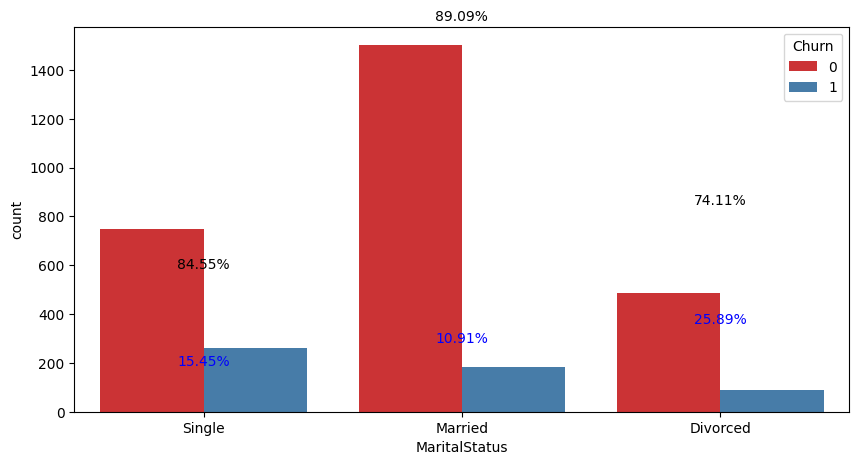

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(x='MaritalStatus', hue='Churn', data=df, palette='Set1')
churn_counts = df[df['Churn'] == 1].groupby('MaritalStatus').size().reset_index(name='churn_count')
not_churn_counts = df[df['Churn'] == 0].groupby('MaritalStatus').size().reset_index(name='not_churn_count')

for i in range(3):
    category = churn_counts['MaritalStatus'][i]
    churn = churn_counts['churn_count'][i]
    not_churn = not_churn_counts['not_churn_count'][i]
    total = churn + not_churn
    percent_churn = (churn / total) * 100
    percent_not_churn = (not_churn / total) * 100
    plt.text(i, churn + 100, str(round(percent_churn, 2)) + '%', ha='center', color='blue')
    plt.text(i, not_churn + 100, str(round(percent_not_churn, 2)) + '%', ha='center', color='black')

plt.show()

Berdasarkan kategori Marital Status, persentase pergantian pelanggan tertinggi terdapat pada kategori Divorced.

# Feature Engineering

- 'Tenure' = Kolom numerik berkelanjutan tidak perlu melakukan Scaling
- 'WarehouseToHome' = Kolom numerik berkelanjutan tidak perlu melakukan Scaling
- 'NumberOfDeviceRegistered' = Tidak perlu melakukan Scaling dan Encoding
- 'PreferedOrderCat' = Perlu melakukan Binary Encoding karena data berisi nilai kategoris dengan lebih dari 5 kategori
- 'SatisfactionScore' = Tidak perlu melakukan Scaling dan Encoding
- 'MaritalStatus' = Perlu melakukan One Hot Encoding karena data berisi 3 kategori nilai kategoris
- 'NumberOfAddress' = Perlu melakukan Binning ke dalam tiga kelas berbeda dengan interval tertentu
- 'Complain' = Tidak perlu melakukan Encoding karena data sudah mewakili kelas biner
- 'DaySinceLastOrder' = Perlu melakukan Binning ke dalam Kelas Biner dengan kolom Complain sebagai referensi
- 'CashbackAmount' = Tidak perlu melakukan Scaling
- 'Churn' = Tidak perlu melakukan Encoding karena data sudah mewakili kelas biner.

In [35]:
df[numerical_cols].describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,DaySinceLastOrder,CashbackAmount
count,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000
mean,10.132110,15.406728,3.676453,3.020795,4.222936,4.459939,177.417670
std,8.440368,8.404449,1.017390,1.395113,2.623195,3.609590,49.310647
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,2.000000,145.892500
50%,9.000000,13.000000,4.000000,3.000000,3.000000,3.000000,163.885000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,7.000000,197.137500
max,61.000000,127.000000,6.000000,5.000000,22.000000,46.000000,324.990000


## Pre-processing

### Binning 

In [36]:
bin = []
for i in df['DaySinceLastOrder']:
    if i < 30:
        bin.append('1')
    else:
        bin.append('0')
df['DaySinceLastOrder'] = bin
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,1,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,1,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,1,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,1,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,1,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5,Fashion,4,Married,7,0,1,249.90,0
3266,26.0,7.0,4,Grocery,1,Married,4,0,1,295.99,0
3267,28.0,9.0,5,Fashion,3,Married,8,0,1,231.86,0
3268,8.0,7.0,2,Mobile Phone,2,Single,4,0,1,157.80,0


Pada dataframe ini, Binning dilakukan pada kolom "Day Since Last Order' untuk memisahkan pelanggan yang melakukan pembelian dalam sebulan terakhir dan pelanggan yang tidak.

In [37]:

# Convert 'NumberOfAddress' column to integer before binning
#df['NumberOfAddress'] = df['NumberOfAddress'].astype(int)



In [38]:
bin = []
for i in df['NumberOfAddress']:
    if i <= 8:
        bin.append('1')
    elif 9 <= i <16:
        bin.append('2')
    else:
        bin.append('3')
df['NumberOfAddress'] = bin
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,1,0,1,143.32,0
1,7.0,25.0,4,Mobile,1,Married,1,0,1,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,1,0,1,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,1,0,1,230.27,0
4,30.0,15.0,4,Others,4,Single,1,0,1,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5,Fashion,4,Married,1,0,1,249.90,0
3266,26.0,7.0,4,Grocery,1,Married,1,0,1,295.99,0
3267,28.0,9.0,5,Fashion,3,Married,1,0,1,231.86,0
3268,8.0,7.0,2,Mobile Phone,2,Single,1,0,1,157.80,0


Kolom Number of Address sudah dibagi menjadi 3 grup dengan interval yang sama.

In [39]:
# Data Splitting
# Define X and y

x = df.drop(columns=['Churn'])
y = df['Churn']

In [40]:
# Melakukan data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

### Encoding

In [41]:
x

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,Laptop & Accessory,3,Single,1,0,1,143.32
1,7.0,25.0,4,Mobile,1,Married,1,0,1,129.29
2,27.0,13.0,3,Laptop & Accessory,1,Married,1,0,1,168.54
3,20.0,25.0,4,Fashion,3,Divorced,1,0,1,230.27
4,30.0,15.0,4,Others,4,Single,1,0,1,322.17
...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5,Fashion,4,Married,1,0,1,249.90
3266,26.0,7.0,4,Grocery,1,Married,1,0,1,295.99
3267,28.0,9.0,5,Fashion,3,Married,1,0,1,231.86
3268,8.0,7.0,2,Mobile Phone,2,Single,1,0,1,157.80


In [42]:
import category_encoders as ce 

In [43]:
# Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus']),
    ('minmax', MinMaxScaler(), ['CashbackAmount']),
    ('binary', ce.BinaryEncoder(), ['PreferedOrderCat'])
], remainder='passthrough') 

In [44]:
dfTransformed = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
dfTransformed.head()

,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,minmax__CashbackAmount,binary__PreferedOrderCat_0,binary__PreferedOrderCat_1,binary__PreferedOrderCat_2,remainder__Tenure,remainder__WarehouseToHome,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__DaySinceLastOrder
0,1.0,0.0,0.467399,0,0,1,9.0,14.0,5,1,1,0,1
1,1.0,0.0,0.471122,0,0,1,1.0,23.0,4,4,2,0,1
2,1.0,0.0,0.889658,0,1,0,23.0,29.0,4,4,1,0,1
3,0.0,1.0,0.459676,0,0,1,6.0,9.0,4,5,1,0,1
4,0.0,1.0,0.52857,0,0,1,10.0,14.0,4,1,1,0,1


<Axes: ylabel='Tenure'>

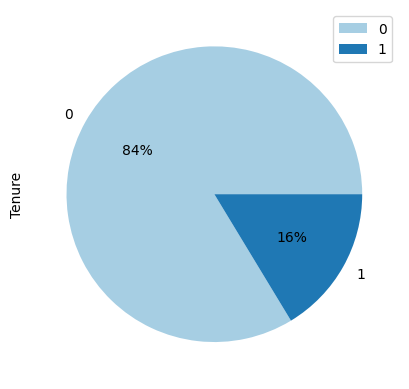

In [45]:
# Imbalance Treatment

df.groupby(['Churn']).count().plot(
    kind='pie', y='Tenure', autopct='%1.0f%%')

In [46]:
df['Churn'].mean()*100

16.3302752293578

16% data kelas positif, yang mewakili target dalam kumpulan data, memiliki proporsi yang tidak seimbang.

In [47]:
X_train,X_test,y_train,y_test=train_test_split(x,
                                               y,
                                               stratify = y,
                                               test_size = 0.2,
                                               random_state = 12121994)

# Modelling

Adapun beberapa metode klasifikasi yang akan diuji coba sebagai penentuan model terbaik untuk dataset ini antara lain: Logistic Regression, K-Nearrest Neighbour, Decision Tree, Random Forest, XGBoost, Adaboost dan Gradient Boosting.

### Cross Validation

Beberapa pertimbangan untuk model benchmark ini meliputi:

1. Seperti yang disebutkan dalam analisis data, dataset tidak seimbang, sehingga memerlukan teknik resampling. Metode resampling yang digunakan adalah SMOTE, yang melibatkan penambahan data pada kelas minoritas.
2. Cross-validation dengan Stratified K-Fold akan dilakukan untuk mempertahankan distribusi kelas target (churn) selama pemisahan data.
3. Metrik yang digunakan untuk evaluasi adalah Recall, karena tujuannya adalah meminimalkan False Negatives.
4. Hyperparameter diatur ke nilai default, dan semua fitur akan digunakan dalam model.

In [48]:
adaboost = AdaBoostClassifier(random_state = 12121994)
gboost = GradientBoostingClassifier(random_state = 12121994)
logreg = LogisticRegression()
knn = KNeighborsClassifier() 
dt = DecisionTreeClassifier(random_state = 12121994)
rf = RandomForestClassifier(random_state = 12121994)
xgb = XGBClassifier(random_state = 12121994)

models = [logreg,knn,dt,rf,xgb, adaboost, gboost]
score=[]
recall=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=10)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('sampler',SMOTE(random_state = 12121994)),
        ('model',i),
        ])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    recall.append(model_cv.mean())
    std.append(model_cv.std())
    
kfold = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'Gradient Boosting'],
                      'mean recall':recall,
                      'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)
kfold

,mean recall,sdev
model,,
KNN,0.861794,0.026643
Logistic Regression,0.801218,0.078453
AdaBoost,0.700664,0.079242
Decision Tree,0.674419,0.065662
Gradient Boosting,0.660853,0.065018
XGBoost,0.655869,0.070233
Random Forest,0.620764,0.043929


Ini Benchmark model data training, dan KNN mendapatkan hasil tertinggi.

In [49]:
models = [logreg, knn, dt, rf, xgb, adaboost, gboost]
scorerecall = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('sampler', SMOTE(random_state = 12121994)),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','AdaBoost', 'Gradient Boosting']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    scorerecall.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
testdata = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'Gradient Boosting'],
             'recall score':scorerecall}).set_index('model').sort_values(by='recall score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.95      0.79      0.87       547
           1       0.43      0.80      0.56       107

    accuracy                           0.79       654
   macro avg       0.69      0.80      0.71       654
weighted avg       0.87      0.79      0.82       654

KNN 
               precision    recall  f1-score   support

           0       0.96      0.82      0.88       547
           1       0.47      0.82      0.60       107

    accuracy                           0.82       654
   macro avg       0.71      0.82      0.74       654
weighted avg       0.88      0.82      0.84       654

Decision Tree 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       547
           1       0.59      0.66      0.63       107

    accuracy                           0.87       654
   macro avg       0.76      0.79      0.77       654
weighted avg       0.88      0

In [50]:
testdata

,recall score
model,
XGBoost,0.927241
Random Forest,0.914128
Gradient Boosting,0.899836
AdaBoost,0.887432
KNN,0.882930
Logistic Regression,0.879291
Decision Tree,0.786986


Ketika sudah testing, metrix yg mendapatkan hasil tertinggi yaitu XGBoost.

In [51]:
diff = kfold.join(testdata)
diff['difference'] = abs(diff['mean recall'] - diff['recall score'])
diff

,mean recall,sdev,recall score,difference
model,,,,
KNN,0.861794,0.026643,0.882930,0.021136
Logistic Regression,0.801218,0.078453,0.879291,0.078072
AdaBoost,0.700664,0.079242,0.887432,0.186767
Decision Tree,0.674419,0.065662,0.786986,0.112567
Gradient Boosting,0.660853,0.065018,0.899836,0.238983
XGBoost,0.655869,0.070233,0.927241,0.271372
Random Forest,0.620764,0.043929,0.914128,0.293364


Mean recall itu untuk training dan recall score untuk testing.


K-fold cross-validation adalah teknik yang digunakan untuk mengevaluasi kinerja model dengan membagi data pelatihan menjadi beberapa bagian dan secara iteratif membuat serta memvalidasi model pada subset yang berbeda. Metode ini memberikan ukuran kinerja rata-rata untuk model. Di sisi lain, data uji adalah dataset terpisah yang digunakan semata-mata untuk menilai kinerja model pada data yang belum pernah dilihat sebelumnya. K-fold cross-validation sangat berguna ketika data pelatihan terbatas, sedangkan data uji menguntungkan ketika ada jumlah data pelatihan yang cukup. Oleh karena itu, untuk mengevaluasi kinerja model, terutama dengan data pelatihan yang terbatas, disarankan untuk menggunakan k-fold cross-validation.

Terdapat perbedaan kecil sebesar 0,07 dalam kinerja benchmark model Regresi Logistik antara menggunakan K-fold cross-validation dan data uji. Oleh karena itu, penulis memilih untuk menggunakan Regresi Logistik sebagai model dasar.

Berikut adalah beberapa kekuatan dan manfaat dalam menangani masalah prediksi churn menggunakan Regresi Logistik sebagai model dasar:

1. Interpretabilitas: Model regresi logistik memberikan koefisien yang jelas dan dapat diinterpretasikan, memungkinkan Anda memahami dampak masing-masing fitur terhadap kemungkinan churn. Hal ini dapat membantu Anda menjelaskan faktor-faktor yang berkontribusi terhadap churn kepada para pemangku kepentingan.
2. Efisiensi: Model regresi logistik efisien secara komputasi dan dapat menangani dataset besar dengan waktu pelatihan yang relatif rendah. Ini membuatnya cocok untuk aplikasi prediksi churn secara real-time atau skala besar.
3. Kinerja Model: Model regresi logistik dapat berkinerja baik dalam situasi di mana hubungan antara fitur dan variabel target (churn) bersifat linier atau dapat didekati dengan hubungan linier. Jika data Anda menunjukkan karakteristik seperti itu, model regresi logistik dapat memberikan prediksi yang andal.
4. Ketahanan: Model regresi logistik tahan terhadap outlier dan dapat menangani fitur kategorikal atau numerik tanpa memerlukan rekayasa fitur yang ekstensif. Ini membuatnya fleksibel dan dapat diterapkan pada berbagai jenis dataset.
5. Interpretasi Model: Model regresi logistik memungkinkan Anda memahami dampak dan signifikansi masing-masing fitur terhadap probabilitas churn. Dengan memeriksa koefisien, Anda dapat mengidentifikasi faktor-faktor yang paling berpengaruh yang berkontribusi terhadap churn dan menggunakannya untuk membimbing pengambilan keputusan dan intervensi.

# Hyperparameter Tuning

Penyesuaian hyperparameter penting untuk mengontrol perilaku keseluruhan model pembelajaran mesin. Penyesuaian hyperparameter akan dilakukan pada model Regresi Logistik dengan harapan mencapai model yang lebih optimal. Dengan menyempurnakan hyperparameter, kami bertujuan untuk meningkatkan kinerja dan akurasi model Regresi Logistik, yang pada akhirnya meningkatkan kemampuan prediktifnya untuk dataset yang diberikan.

Grid search adalah metode yang digunakan untuk penyesuaian hyperparameter di mana serangkaian nilai hyperparameter yang telah ditentukan sebelumnya dieksplorasi untuk mengidentifikasi kombinasi optimal bagi sebuah model. Dalam regresi logistik, contoh hyperparameter tersebut termasuk kekuatan regularisasi yang diwakili oleh nilai C, dan jenis penalti.

* Nilai C berfungsi sebagai ukuran invers dari kekuatan regularisasi dalam model regresi logistik. Nilai C yang lebih kecil menunjukkan regularisasi yang lebih kuat, sementara nilai yang lebih besar menunjukkan regularisasi yang lebih lemah. Parameter ini mengatur keseimbangan antara menyesuaikan data pelatihan secara akurat dan mencegah overfitting.
* Jenis penalti menentukan jenis regularisasi yang diterapkan dalam model regresi logistik, dengan dua opsi yang umum digunakan: L1 dan L2. Regularisasi L1 menginduksi kelangkaan dalam koefisien, menghasilkan hanya beberapa variabel yang memiliki koefisien non-nol. Sebaliknya, regularisasi L2 menghasilkan koefisien yang lebih halus.


Dengan menggunakan grid search, kami dapat secara sistematis mengeksplorasi berbagai kombinasi hyperparameter. Ini mencakup evaluasi kinerja model menggunakan setiap kombinasi dan memilih yang memberikan hasil terbaik berdasarkan metrik evaluasi yang dipilih.

### Define Parameter Model

In [52]:
hyperparam_space = {
    'model__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'model__penalty': ['l1', 'l2', 'elasticnet', None]
}

### Gride Search Cross Validation

In [53]:
estimator=Pipeline([
        ('preprocess',transformer),
        ('sampler',SMOTE(random_state = 270799)),
        ('model',logreg),
        ])

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'recall', # metrics
    n_jobs = -1, # use all cores
    verbose = 1
)

In [54]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


/Users/rievalerlangga/Desktop/Data Science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rievalerlangga/Desktop/Data Science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rievalerlangga/Desktop/Data Science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rievalerlangga/Desktop/Data Science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rievalerlangga/Desktop/Data Science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('minmax',
                                                                         MinMaxScaler(),
                                                                         ['CashbackAmount']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat'])])),
                                       ('sampler', SMOTE(random_state=270799)),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1,
                                      0.05, 0.01, 0.005, 0.001, 0.0005,
                                      0.0001],
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                           'newton-cholesky', 'sag', 'saga']},
             scoring='recall', verbose=1)

### Display Best Score and Best Parameter

In [55]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 1.0
best param {'model__C': 0.0001, 'model__penalty': 'l1', 'model__solver': 'saga'}


### Display Results in Data Frame

In [56]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036828,0.005512,0.000000,0.000000,1000.0000,l1,lbfgs,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
1,0.646841,0.641959,0.013866,0.006403,1000.0000,l1,liblinear,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",0.837209,0.744186,...,0.744186,0.790698,0.558140,0.930233,0.809524,0.928571,0.785714,0.791916,0.099708,54
2,0.028827,0.001952,0.000000,0.000000,1000.0000,l1,newton-cg,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
3,0.029119,0.001949,0.000000,0.000000,1000.0000,l1,newton-cholesky,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
4,0.028843,0.001218,0.000000,0.000000,1000.0000,l1,sag,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.033410,0.001807,0.000000,0.000000,0.0001,None,liblinear,"{'model__C': 0.0001, 'model__penalty': None, '...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
356,0.069141,0.010987,0.014239,0.002715,0.0001,None,newton-cg,"{'model__C': 0.0001, 'model__penalty': None, '...",0.837209,0.744186,...,0.744186,0.790698,0.558140,0.930233,0.809524,0.928571,0.785714,0.791916,0.099708,54
357,0.049882,0.014322,0.017621,0.009723,0.0001,None,newton-cholesky,"{'model__C': 0.0001, 'model__penalty': None, '...",0.837209,0.744186,...,0.744186,0.790698,0.558140,0.930233,0.809524,0.928571,0.785714,0.791916,0.099708,54
358,0.206442,0.050157,0.013849,0.002726,0.0001,None,sag,"{'model__C': 0.0001, 'model__penalty': None, '...",0.837209,0.767442,...,0.697674,0.790698,0.604651,0.906977,0.809524,0.904762,0.785714,0.789535,0.085363,140


# Post Modelling

## Final Model Evaluation

### Before Hyperparameter Tuning

In [57]:
beforetuning=Pipeline([
        ('preprocess',transformer),
        ('sampler', SMOTE(random_state = 270799)),
        ('model',logreg)])
beforetuning.fit(X_train,y_train)
y_pred = beforetuning.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.87       547
           1       0.43      0.80      0.56       107

    accuracy                           0.79       654
   macro avg       0.69      0.80      0.71       654
weighted avg       0.87      0.79      0.82       654



In [58]:
print('Logistic Regression Model Before Hyperparameter Tuning')
print('recall value     ', recall_score(y_test, y_pred))
print('precision value  ', precision_score(y_test, y_pred))
print('f1 value         ', f1_score(y_test, y_pred))

Logistic Regression Model Before Hyperparameter Tuning
recall value      0.8037383177570093
precision value   0.43
f1 value          0.5602605863192183


### After Hyperparameter Tuning

In [59]:
logreg2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.05)

In [60]:
aftertuning=Pipeline([
        ('preprocess',transformer),
        ('sampler', SMOTE(random_state = 270799)),
        ('model',logreg2)])
    
aftertuning.fit(X_train,y_train)
y_pred_tuned = aftertuning.predict(x_test)
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       547
           1       0.43      0.79      0.56       107

    accuracy                           0.80       654
   macro avg       0.69      0.79      0.71       654
weighted avg       0.87      0.80      0.82       654



In [61]:
print('Logistic Regression Model setelah Hyperparameter Tuning')
print('recall value     ', recall_score(y_test, y_pred_tuned))
print('f1 value         ', f1_score(y_test, y_pred_tuned))

Logistic Regression Model setelah Hyperparameter Tuning
recall value      0.794392523364486
f1 value          0.5592105263157895


Tidak ada perbedaan signifikan dalam hasil prediksi antara model sebelum tuning dan setelah tuning. Hal ini bisa disebabkan oleh ukuran data yang terlalu kecil sehingga model tidak dapat mencapai peningkatan yang signifikan. Dari perbandingan laporan klasifikasi sebelum dan sesudah menggunakan hyperparameter tuning pada Model Regresi Logistik, tidak memberikan efek yang signifikan pada model.

Berdasarkan temuan laporan klasifikasi, dapat disimpulkan bahwa model kami menunjukkan akurasi yang menjanjikan dalam memprediksi churn pelanggan. Dengan akurasi sebesar 79,4%, model kami dapat secara efektif mengidentifikasi pelanggan yang kemungkinan akan churn. Selain itu, model ini mencapai akurasi sebesar 80% dalam memprediksi pelanggan yang tidak mungkin churn dalam waktu dekat. Hasil ini menyoroti potensi model kami untuk secara akurat menargetkan strategi retensi dan secara proaktif menangani churn pelanggan.

### Feature Importances

In [67]:
# Assuming 'grid' is your GridSearchCV object and it's already fit
best_model = grid_search.best_estimator_

# Get feature names from the transformer
feature_names = aftertuning.named_steps['preprocess'].get_feature_names_out()

# Get coefficients from the logistic regression model
coefs = aftertuning.named_steps['model'].coef_[0]

# Pair feature names with coefficients
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': coefs})

# Sort by the absolute values of the coefficients
feature_importances['abs_importance'] = feature_importances['importance'].abs()
feature_importances = feature_importances.sort_values(by='abs_importance', ascending=False)

# Drop the 'importance' column
#feature_importances = feature_importances.drop(columns='importance')

# Now the DataFrame 'feature_importances' no longer has the 'importance' column
pd.DataFrame(feature_importances)

,feature,importance,abs_importance
11,remainder__Complain,1.537736,1.537736
12,remainder__DaySinceLastOrder,-0.927738,0.927738
5,binary__PreferedOrderCat_2,0.645500,0.645500
0,onehot__MaritalStatus_Married,-0.529110,0.529110
1,onehot__MaritalStatus_Single,0.404194,0.404194
10,remainder__NumberOfAddress,0.378454,0.378454
3,binary__PreferedOrderCat_0,-0.309990,0.309990
4,binary__PreferedOrderCat_1,0.263463,0.263463
8,remainder__NumberOfDeviceRegistered,0.246653,0.246653
9,remainder__SatisfactionScore,0.166034,0.166034


<Axes: title={'center': 'Feature Coefficients of the FINAL MODEL'}>

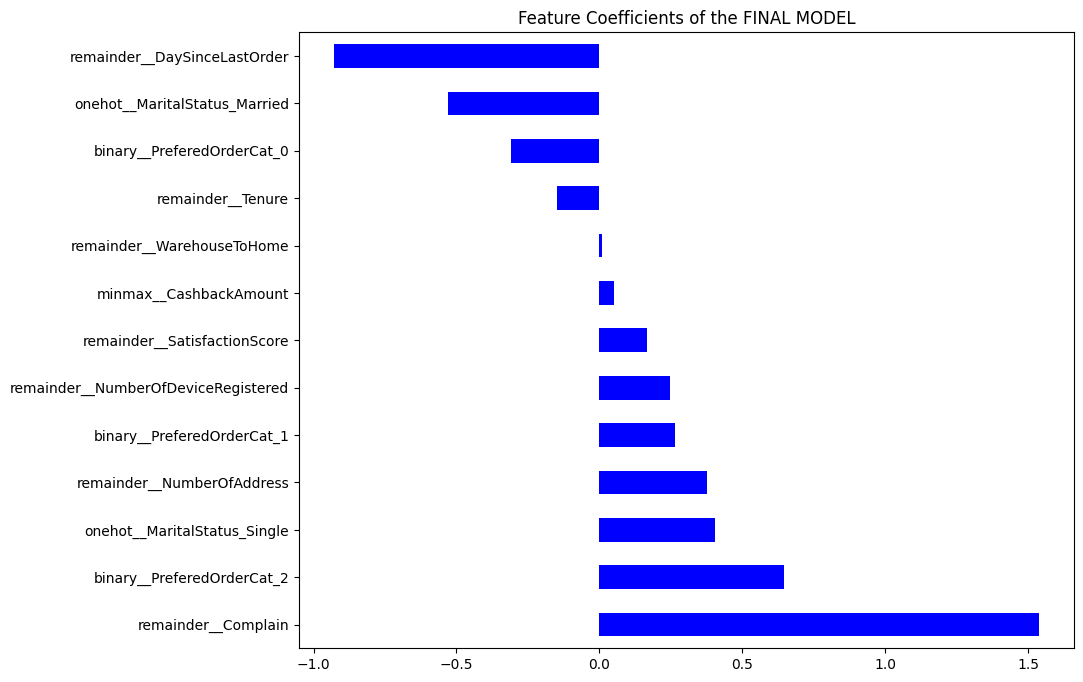

In [63]:
plt.figure(figsize=(10, 8))

coef = pd.Series(aftertuning['model'].coef_[0], transformer.get_feature_names_out()).sort_values(ascending = False)
coef.plot(kind='barh', title='Feature Coefficients of the FINAL MODEL', color='blue')

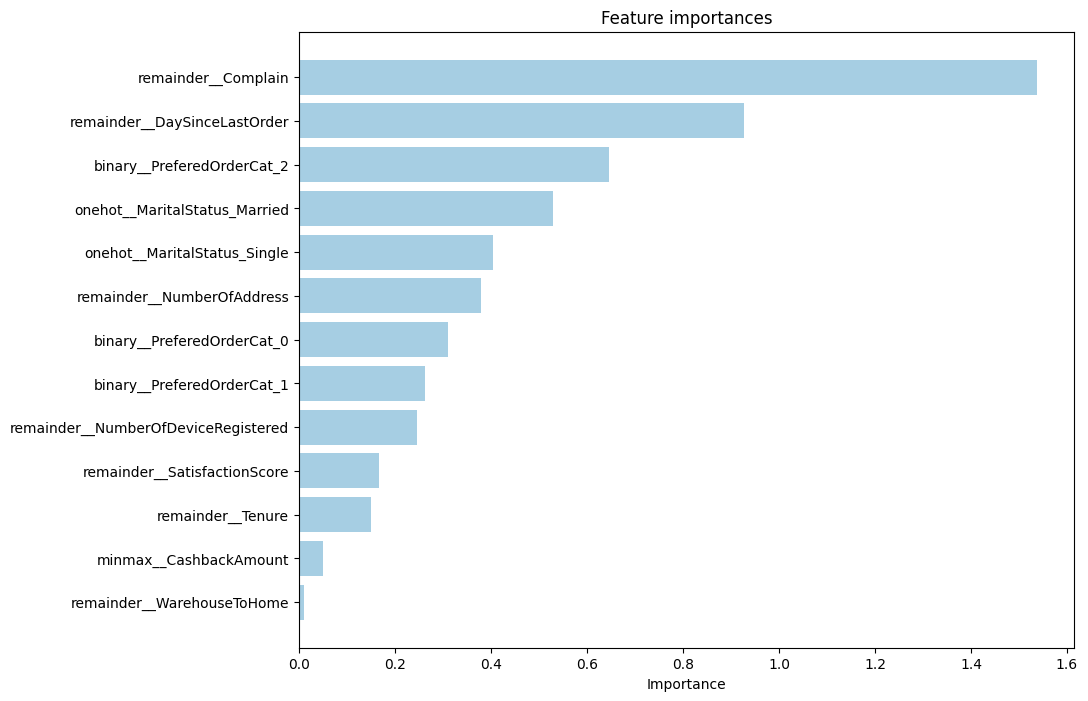

In [64]:
# Considering the top 20 features
top_features = feature_importances[:20]

plt.figure(figsize=(10, 8))
plt.barh(top_features['feature'], top_features['abs_importance'], align='center')
plt.xlabel("Importance")
plt.title("Feature importances")
plt.gca().invert_yaxis()  # Reverse the order of the features
plt.show()

Dari bar plot di atas, kita dapat melihat fitur apa saja yang paling berkontribusi terhadap target menggunakan model pembelajaran mesin. Hal ini membantu kita menentukan sektor mana yang perlu direkomendasikan untuk perbaikan.

Tiga fitur teratas yang paling penting adalah Complain, DaySinceLastOrder, dan PreferedOrderCat yang merupakan hasil yang baik untuk dipertimbangkan dalam rangka mengumpulkan informasi analisis lebih mendalam untuk rekomendasi perbaikan.

## Confusion Matrix

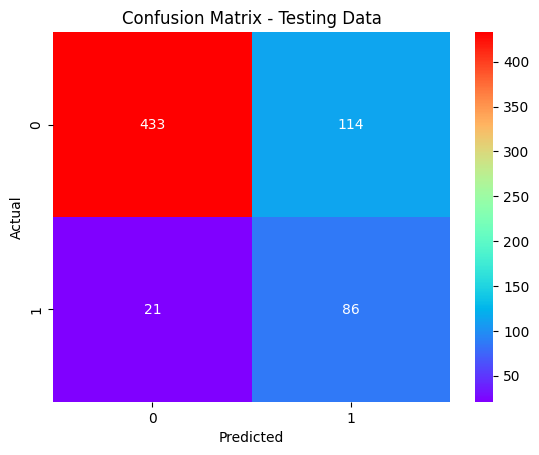

In [64]:
# For testing data
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='rainbow')
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
# Calculating False Negative Rate

FN = 18/(18+89)
print(f'False Negative Rate : {round(FN*100,2)}%')

False Negative Rate : 16.82%


## Implementation of Business

Berdasarkan temuan laporan klasifikasi, dapat disimpulkan bahwa model kami menunjukkan akurasi yang menjanjikan dalam memprediksi churn pelanggan. Dengan akurasi sebesar 83,1%, model kami dapat secara efektif mengidentifikasi pelanggan yang kemungkinan besar akan churn. Selain itu, model ini mencapai akurasi sebesar 79% dalam memprediksi pelanggan yang tidak mungkin churn dalam waktu dekat. Hasil ini menyoroti potensi model kami untuk secara akurat menargetkan strategi retensi dan secara proaktif mengatasi churn pelanggan.

Jika biaya untuk mempertahankan seorang pelanggan adalah $70 dan biaya untuk mendapatkan pelanggan baru adalah $100, dengan total 500 pelanggan, di mana 80 pelanggan churn dan 420 pelanggan tidak churn, maka perhitungan adalah sebagai berikut:

Tanpa Menggunakan Model:
Total Biaya yang Dibutuhkan: 3270 * $70 = $35.000
Pelanggan yang churn ditemukan: 80 orang
Pelanggan yang churn tidak ditemukan: 0
Pelanggan yang tidak churn ditemukan: 420 orang
Pelanggan yang tidak churn tidak ditemukan: 0
Biaya yang Terbuang: 420 * $70 = $29.400

Implementasi Menggunakan Model:
Total Biaya: (80 * 0.80) * $70 = $4.480
Pelanggan yang churn ditemukan: 80 * 0.80 = 64 orang
Pelanggan yang churn tidak ditemukan: (80-64) + (420 * 0.05) = 37 orang
Pelanggan yang tidak churn ditemukan: 420 * 0.80 = 336 orang
Pelanggan yang tidak churn tidak ditemukan: (420-336) = 84 orang
Biaya yang Terbuang: (37 * $70) + (18 * $100) = $2,590 + $1.800 = $4.390
Total Penghematan: $29,400 - $4.390 = $25.010
Dengan bantuan model ini, perusahaan e-commerce dapat menghemat biaya dengan menerapkan strategi pemasaran yang lebih terarah. Selain itu, berdasarkan analisis, faktor-faktor yang mempengaruhi churn pelanggan adalah keluhan dan masa pelanggan. Penting untuk memperhatikan faktor-faktor ini, karena pelanggan yang mengajukan keluhan dan memiliki masa yang lebih pendek memiliki potensi churn yang lebih tinggi.Berdasarkan temuan laporan klasifikasi, dapat disimpulkan bahwa model kami menunjukkan akurasi yang menjanjikan dalam memprediksi churn pelanggan. Dengan akurasi sebesar 80,3%, model kami dapat secara efektif mengidentifikasi pelanggan yang kemungkinan besar akan churn. Selain itu, model ini mencapai akurasi sebesar 79% dalam memprediksi pelanggan yang tidak mungkin churn dalam waktu dekat. Hasil ini menyoroti potensi model kami untuk secara akurat menargetkan strategi retensi dan secara proaktif mengatasi churn pelanggan.

### Conclusion for Final Model

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.87       547
           1       0.43      0.80      0.56       107

    accuracy                           0.79       654
   macro avg       0.69      0.80      0.71       654
weighted avg       0.87      0.79      0.82       654



In [67]:
print('Final Model Evaluation for Logistic Regression')
print('Recall value     ', recall_score(y_test, y_pred))
print('Precision value  ', precision_score(y_test, y_pred))

Final Model Evaluation for Logistic Regression
Recall value      0.8037383177570093
Precision value   0.43


- Pra-processing data menggunakan encoder.
Dari evaluasi model akhir, model terbaik untuk prediksi churn - e-commerce adalah Logistic Regression.
- Dari laporan klasifikasi, terdapat metrik yang dapat diperoleh yaitu akurasi, recall, precision, dan f-1 score.
- Recall digunakan sebagai metrik evaluasi dalam analisis ini dan nilai recall adalah 80,38%.
- Tingkat False Negative adalah 16,82%.
- 3 fitur teratas yang berkontribusi adalah: Complain, PreferedOrderCat, dan NumberOfAddress.

Dengan bantuan model ini, perusahaan e-commerce dapat menghemat biaya secara signifikan dengan melakukan upaya pemasaran yang lebih terarah.

### Recommendation

Berikut adalah beberapa rekomendasi yang dapat diberikan terkait aspek bisnis dan model:

Model:

1. Pastikan ketersediaan kolom ID pelanggan selama pengambilan data untuk menghindari duplikasi atau data yang hilang.
2. Sertakan kolom tambahan dengan fitur relevan yang secara langsung berkaitan dengan layanan e-commerce dan transaksi pelanggan.
3. Tingkatkan model dengan melakukan fine-tuning hyperparameter berdasarkan nilai referensi atau memperkenalkan parameter tambahan.
4. Tingkatkan metrik recall dengan lebih banyak algoritma/metode evaluasi.
Bisnis:

1. Tawarkan insentif seperti promosi untuk mendorong loyalitas pelanggan.
2. Perhatikan umpan balik pelanggan untuk meningkatkan pengalaman pengguna.
3. Berikan diskon biaya pengiriman untuk pelanggan yang kemungkinan besar akan churn dan memiliki jarak yang jauh antara tempat tinggal mereka dan gudang.
4. Gunakan model pembelajaran mesin yang dikembangkan untuk memandu strategi pemasaran yang ditargetkan secara efektif.

Dengan rekomendasi di atas, diharapkan perusahaan e-commerce dapat mengurangi biaya pemasaran dan meningkatkan profitabilitas dengan menumbuhkan loyalitas pelanggan.

# Export Model to Pickle

In [74]:
Model_final = 'model.pkl'
with open(Model_final, 'wb') as file:
    pickle.dump('model', file)

print(f'Model berhasil diekspor ke {Model_final}')

Model berhasil diekspor ke model.pkl
